# Text Splitting

Text Splitting is the process of breaking large chunks of texts (like articles, PDFs, HTML pages, or books) into smaller, manageable pieces (chunks) that an LLM can handle effectively.

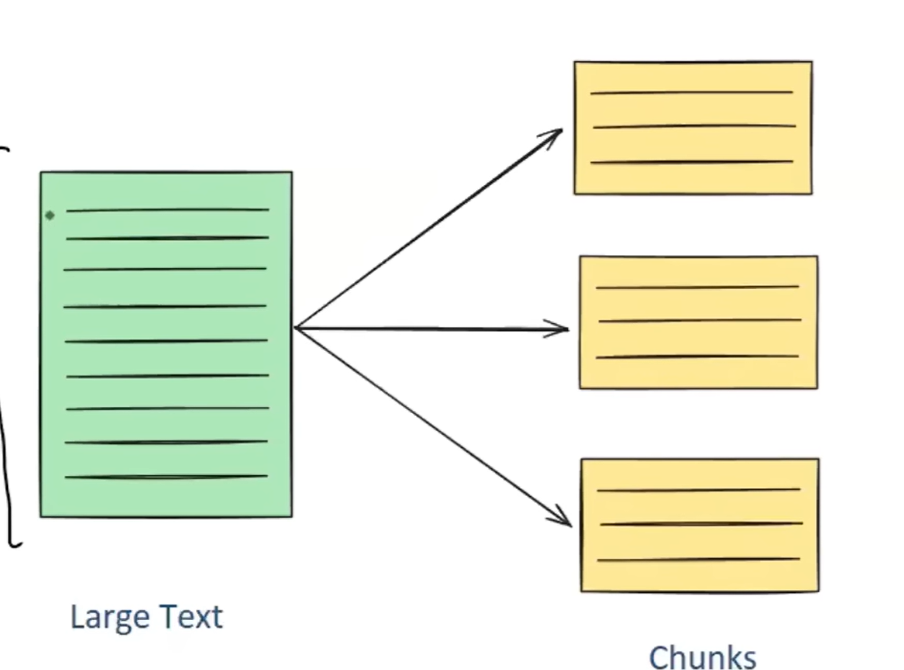

**Overcoming model limitations-** Many embedding models and language models have maximum input size constraints. Splitting allows us to process documents that would otherwise exceed these limits.

**Downstream tasks-** Text Splitting improves nearly every LLM powered task

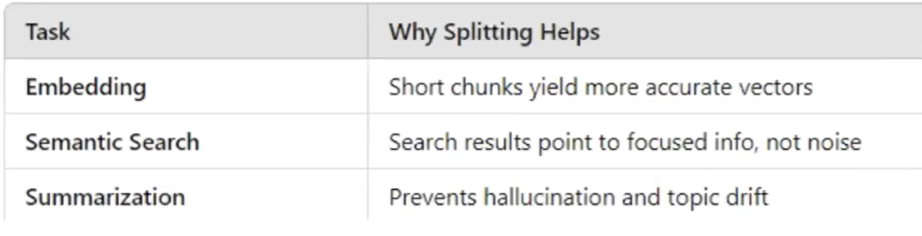

**Optimizing Computational Resources-** Working with smaller chunks of text can be more memory-efficient and allow for better parallelization of processing tasks.

## Types of Text Splitters

1. Length Based
2. Text Structure Based
3. Document Structure Based
4. Semantic Meaning Based

# 1. Length Based Text Splitting

- A length-based text splitter in LangChain divides large text into smaller chunks based on a fixed length (characters or tokens).
- It helps handle long documents and avoid model token limits.
- Chunk overlap can be added to keep context between chunks.
- It is simple and fast but may split text in the middle of sentences.

In [4]:
from langchain_text_splitters import CharacterTextSplitter

In [5]:
text = """
This is a simple sample data to split the text data 
for the testing purpose, now we will add the gap here

to it seems to be real
"""

In [33]:
splitter = CharacterTextSplitter(
    chunk_size=30,
    chunk_overlap=10,
    separator='',
)

In [34]:
splitter

In [36]:
splitter.split_text(text)
# there is sllit_document, which is used to split document loaded from document_loaders

['This is a simple sample data',
 'mple data to split the text da',
 'he text data \nfor the testing',
 'e testing purpose, now we will',
 'ow we will add the gap here\n\nt',
 'ap here\n\nto it seems to be rea',
 'to be real']

# Text-Structured based Text Splitting

**Text-Structured based text splitting** is a method of dividing large text into smaller parts **by using the natural structure of the text** instead of cutting it randomly.

It splits text based on:

* **Headings**
* **Paragraphs**
* **Sections**
* **Sub-sections**
* **Bullet points**

The main goal is to **keep related information together**, so the meaning of the text is not lost.

**Why it is useful:**

* Preserves context and meaning
* Improves accuracy in **NLP, LLMs, and RAG systems**
* Makes text easier to search and process

**Example:**
A document is split by chapters → sections → paragraphs, rather than by fixed word count.


## Code

In [1]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [2]:
text = """
The Scout Regiment, also known as the Survey Corps, is a crucial branch of the Eldian military in the Attack on Titan series. 
They are responsible for direct Titan combat, Titan study, human expansion, and outside exploration. Despite their high death rate and the dangers of their missions, 
the Scout Regiment has been instrumental in pushing back the frontier against the Titans and uncovering the mysteries of the humanoid beasts. 

Their members are highly skilled in using omni-directional mobility gear and have been involved in numerous battles and skirmishes throughout the series. 
The regiment's leadership has changed over time, with Erwin Smith, Hange Zoë, and Armin Arlert taking on the mantle of command. 
The Scout Regiment's efforts have been vital in reclaiming territory lost to the Titans and uncovering the secrets of the Titans.
"""

In [10]:
# Initialize the splitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size=300,
    chunk_overlap=0
)

In [11]:
splitter

In [12]:
result = splitter.split_text(text)

In [13]:
len(result)

4

In [14]:
result

['The Scout Regiment, also known as the Survey Corps, is a crucial branch of the Eldian military in the Attack on Titan series. \nThey are responsible for direct Titan combat, Titan study, human expansion, and outside exploration. Despite their high death rate and the dangers of their missions,',
 'the Scout Regiment has been instrumental in pushing back the frontier against the Titans and uncovering the mysteries of the humanoid beasts.',
 "Their members are highly skilled in using omni-directional mobility gear and have been involved in numerous battles and skirmishes throughout the series. \nThe regiment's leadership has changed over time, with Erwin Smith, Hange Zoë, and Armin Arlert taking on the mantle of command.",
 "The Scout Regiment's efforts have been vital in reclaiming territory lost to the Titans and uncovering the secrets of the Titans."]

# Document Structure Based Text Splitter

**Document structure–based text splitting** is a technique that divides a document into smaller chunks **according to its structure** instead of using fixed character or token limits.

It splits text using:

* **Titles and headings**
* **Subheadings**
* **Paragraph breaks**
* **Lists and sections**

This method keeps **related content together**, so the meaning and context are preserved.

**Why it is important:**

* Maintains logical flow of the document
* Improves understanding for **LLMs and RAG systems**
* Reduces loss of context during processing

**Example:**
A PDF is split chapter-wise, then section-wise, instead of splitting every 500 characters.



## Code

In [15]:
from langchain_text_splitters import RecursiveCharacterTextSplitter, Language

In [18]:
text="""
class Student:
    def __init__(self, name, age, grade):
        self.name = name
        self.age = age
        self.grade = grade # grade is a float (like 8.5, 9.2)

    def get_details(self):
        return self.name

    def is_passing(self):
        return self.grade >= 6.0

# Example Usage
student1 = Student("Mohit", 20, 7.7)
print(student1.get_details())

if student1.is_passing():
    print("The student is passing.")
else:
    print("The Student is not passing.")
"""

In [35]:
splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.PYTHON,
    chunk_size=300,
    chunk_overlap=0,
)

In [36]:
result = splitter.split_text(text)

In [37]:
len(result)

2

In [38]:
print(result[0])

class Student:
    def __init__(self, name, age, grade):
        self.name = name
        self.age = age
        self.grade = grade # grade is a float (like 8.5, 9.2)

    def get_details(self):
        return self.name

    def is_passing(self):
        return self.grade >= 6.0


In [39]:
print(result[1])

# Example Usage
student1 = Student("Mohit", 20, 7.7)
print(student1.get_details())

if student1.is_passing():
    print("The student is passing.")
else:
    print("The Student is not passing.")


# Semantic Meaning Based

In [6]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings
from dotenv import load_dotenv
import os

In [7]:
load_dotenv()

True

In [9]:
OPEN_AI_KEY = os.getenv('OPEN_AI_KEY')

In [16]:
text = """
Farmers were working hard in the fields, preparing the soil and planting seeds for the next season. The sun was bright, and the air smelled of earth and fresh grass. The Indian Premier League (IPL) is the biggest cricket league in the world. People all over the world watch the matches and cheer for their favourite teams.

Terrorism is a big danger to peace and safety. It causes harm to people and creates fear in cities and villages. When such attacks happen, they leave behind pain and sadness. To fight terrorism, we need strong laws, alert security forces, and support from people who care about peace and safety.
"""

In [50]:
text_splitter = SemanticChunker(
    OpenAIEmbeddings(
        api_key=OPEN_AI_KEY,
        model="text-embedding-3-large",
        base_url="https://openrouter.ai/api/v1",
    ),
    breakpoint_threshold_type='standard_deviation',
    breakpoint_threshold_amount=1,
)

In [51]:
text_splitter

In [52]:
result = text_splitter.split_text(text)

In [53]:
len(result)

3

In [55]:
result

['\nFarmers were working hard in the fields, preparing the soil and planting seeds for the next season.',
 'The sun was bright, and the air smelled of earth and fresh grass. The Indian Premier League (IPL) is the biggest cricket league in the world. People all over the world watch the matches and cheer for their favourite teams.',
 'Terrorism is a big danger to peace and safety. It causes harm to people and creates fear in cities and villages. When such attacks happen, they leave behind pain and sadness. To fight terrorism, we need strong laws, alert security forces, and support from people who care about peace and safety. ']